In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [2]:
# Load the data

UsedCar = pd.read_csv(r"C:\Users\User\Downloads\used_cars_data-1 (1).csv")

UsedCar

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN


In [3]:
# To check the first 10 rows of the data

UsedCar.head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,10.25,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21.00,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,7.63,1.95


In [4]:
# To check the dimension of the data

UsedCar.shape

(7253, 14)

- There are 7253 rows and 14 columns in the data

In [5]:
# To check the data types

UsedCar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


- There are 8 categorical and 6 numerical variables in the data
- There are missing values in Mileage, Engine, Seat, Power, and Price

In [6]:
# To check the describe statistics

UsedCar.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Obseervation**

- The top location in the data is Munbai and there are 11 unique locations 
- The top  brand and model name is Mahindra XUV500 W82WD 
- The New_Price varies from 3.91 to 375 dollars
- The Price varies from 0.44 to 160 dollars
- The transmission power has 2 unique number but manual is the most frequent
- The fuel_type has 5 unique fuels but diesel is the top

In [7]:
# To check for duplication

UsedCar.duplicated().sum()

0

- There is no dupliated values in the data

In [8]:
# To check the missing values in the data

UsedCar.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

- There are no missing values in the data

### Filling the missing values in the target

In [9]:
# To check the missing value in the target alone

UsedCar["Price"].isna().sum()

1234

- There are 1,234 missing values in the target variable alone

- Filling the missing values of 1,234 with the computation (mean or median) will make the affect the efficiency of our model's performances. Hence the missing values in the target will be dropped

In [10]:
# To drop the missing values in the target variable "Price"

UsedCar.dropna(subset=["Price"], inplace =True)

In [11]:
# To reset the index after dropping the missing values in the data

UsedCar.reset_index(drop =True, inplace=True)

### Filling the missing value in the "Power" variable

In [12]:
# To confirm the missing values in the Power



- There are 143 missing values in the power

In [13]:
# In dealing with missing values in "Power", check the unique values

UsedCar.Power.unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp', nan,
       '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp', '218 bhp',
       '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp', '82.85 bhp',
       '67 bhp', '241.4 bhp', '35 bhp',

In [14]:
UsedCar["Power"] = UsedCar["Power"].str.strip("bhp").str.strip(" ")
UsedCar["Power"]

0       58.16
1       126.2
2        88.7
3       88.76
4       140.8
        ...  
6014       74
6015       71
6016      112
6017     67.1
6018     57.6
Name: Power, Length: 6019, dtype: object

In [15]:
UsedCar["Power"] = UsedCar["Power"].astype("float64")

In [16]:
UsedCar["Engine"] = UsedCar["Engine"].str.strip("CC").str.strip(" ")

In [17]:
UsedCar["Engine"] = UsedCar["Engine"].astype("float64")

In [18]:
UsedCar["Mileage"] = UsedCar["Mileage"].str.strip("km/kg").str.strip("kmpl").str.strip(" ")

In [19]:
UsedCar["Mileage"] = UsedCar["Mileage"].astype("float64")

In [20]:
# To check the unique values of Power again after stripping "bhp"

UsedCar["Power"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6019 entries, 0 to 6018
Series name: Power
Non-Null Count  Dtype  
--------------  -----  
5876 non-null   float64
dtypes: float64(1)
memory usage: 47.1 KB


In [21]:
UsedCar["Engine"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6019 entries, 0 to 6018
Series name: Engine
Non-Null Count  Dtype  
--------------  -----  
5983 non-null   float64
dtypes: float64(1)
memory usage: 47.1 KB


In [22]:
UsedCar["Mileage"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6019 entries, 0 to 6018
Series name: Mileage
Non-Null Count  Dtype  
--------------  -----  
6017 non-null   float64
dtypes: float64(1)
memory usage: 47.1 KB


In [23]:
# To check the data type of the Power variable

UsedCar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   float64
 9   Engine             5983 non-null   float64
 10  Power              5876 non-null   float64
 11  Seats              5977 non-null   float64
 12  New_Price          6019 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 658.5+ KB


In [24]:
# To check the descriptive statistics of the Power

UsedCar.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,6019.0,3009.000000,1737.679967,0.00,1504.50,3009.00,4513.50,6018.00
Year,6019.0,2013.358199,3.269742,1998.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.00,53000.00,73000.00,6500000.00
Mileage,6017.0,18.134961,4.582289,0.00,15.17,18.15,21.10,33.54
Engine,5983.0,1621.276450,601.355233,72.00,1198.00,1493.00,1984.00,5998.00
Power,5876.0,113.253050,53.874957,34.20,75.00,97.70,138.10,560.00
Seats,5977.0,5.278735,0.808840,0.00,5.00,5.00,5.00,10.00
New_Price,6019.0,21.499855,24.332922,3.91,7.88,11.30,21.77,375.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.00


In [25]:
# To check the missing values again in the data

UsedCar.isna().sum()

S.No.                  0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
New_Price              0
Price                  0
dtype: int64

In [26]:
# To compute the missing value

UsedCar.fillna(value =UsedCar[["Mileage",'Engine','Power', 'Seats']].median(), inplace =True)

In [27]:
# To check the missing values in the data

UsedCar.isna().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

## Visualisation


- Univariates

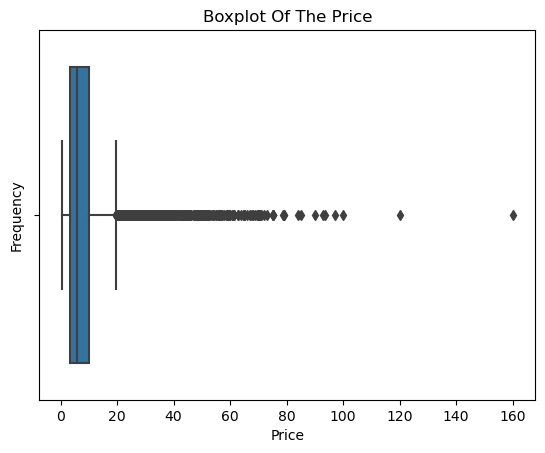

In [28]:
# Box plot to visually view target variable

sns.boxplot(data = UsedCar, x = "Price");
plt.title("Boxplot Of The Price")
plt.xlabel("Price")
plt.ylabel("Frequency");

- The distribution is right skewed because of these high prices
- There are outliners on the upper wisker

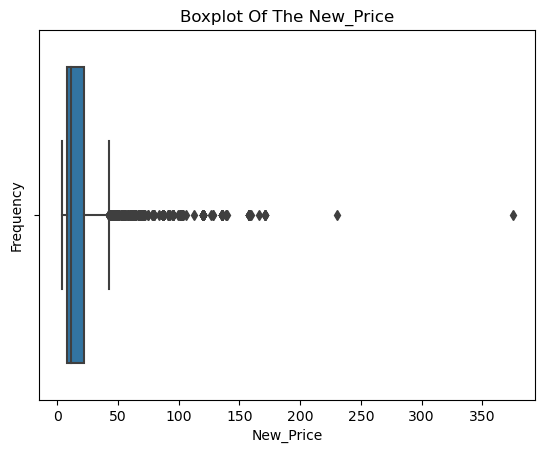

In [29]:
# Box plot to visually view New_price variable

sns.boxplot(data = UsedCar, x = "New_Price");
plt.title("Boxplot Of The New_Price")
plt.xlabel("New_Price")
plt.ylabel("Frequency");

- The distribution is right skewed because of these high prices from the descriptive analysis.
- There are outliers

## Bivariate plots

In [30]:
# To the correlation between the two variables

UsedCar_mat = UsedCar.corr()

UsedCar_mat

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,1.000000,0.002354,-0.008734,0.023674,-0.004117,-0.012064,-0.010727,-0.013431,-0.020275
Year,0.002354,1.000000,-0.173048,0.321534,-0.050086,0.024195,0.015204,-0.007432,0.305327
Kilometers_Driven,-0.008734,-0.173048,1.000000,-0.065253,0.090890,0.032080,0.082782,0.016720,-0.011493
Mileage,0.023674,0.321534,-0.065253,1.000000,-0.586404,-0.497666,-0.299632,-0.415006,-0.306588
Engine,-0.004117,-0.050086,0.090890,-0.586404,1.000000,0.860410,0.393368,0.697517,0.657347
Power,-0.012064,0.024195,0.032080,-0.497666,0.860410,1.000000,0.102470,0.791913,0.769711
Seats,-0.010727,0.015204,0.082782,-0.299632,0.393368,0.102470,1.000000,0.038492,0.052811
New_Price,-0.013431,-0.007432,0.016720,-0.415006,0.697517,0.791913,0.038492,1.000000,0.763362
Price,-0.020275,0.305327,-0.011493,-0.306588,0.657347,0.769711,0.052811,0.763362,1.000000


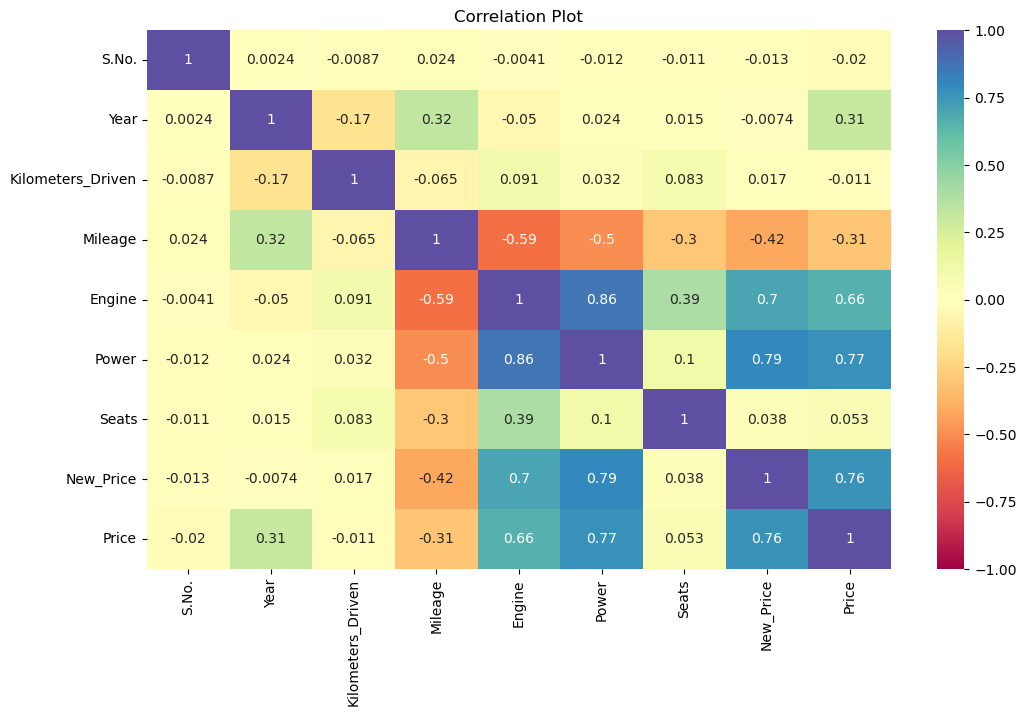

In [31]:
# Heatmap to show relationships among the variables

plt.figure(figsize=(12,7))
sns.heatmap(data =UsedCar_mat, annot= True, vmin= -1, vmax=1, cmap= "Spectral");
plt.title("Correlation Plot")
plt.show();

### I will base my deduction on the target variable and the independent variables

- The target "price" and the maximum Power of the engine have the highest positive correlation of 0.77. 
- The number of the seats in the car and the price have correlation at 0.053
- The New_price (the price of the new car) has correlation with the price of the used car (target) at 0.76. 
- The manufacturing year of the car has positive correlation at 0.31 with the price.
- The mileage of the car has negative correlation with the target at -0.31



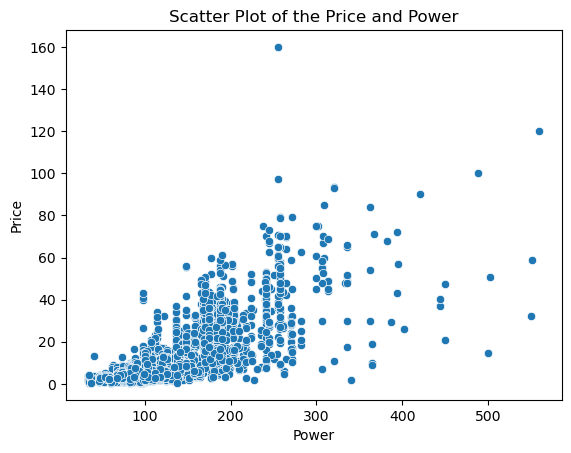

In [32]:
# scatter plot to visually view relationships between the target "Price" and Power variable

sns.scatterplot(data= UsedCar, y ="Price", x = "Power");
plt.title("Scatter Plot of the Price and Power")
plt.ylabel("Price")
plt.xlabel("Power")
plt.show();

**Observations**

- The Power shows correlation with the price; as the price rises, so the power increases.
- The highest price of the used cars of 160 has a power of 250
- The highest power of 560 has three prices, this shows that power is NOT the only determinant of the price of the used cars

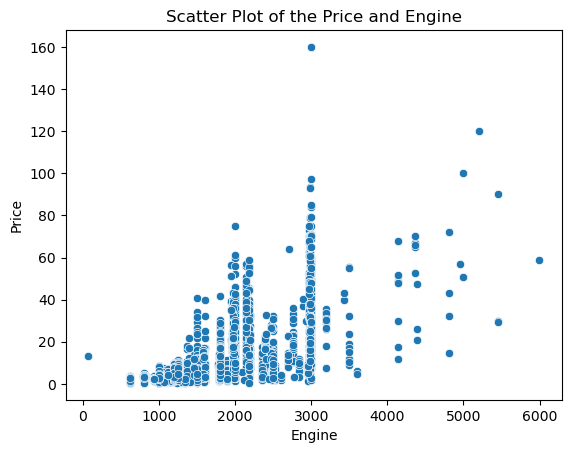

In [33]:
# scatter plot to visually view relationships between the target "Price" and Engine variable

sns.scatterplot(data= UsedCar, y ="Price", x = "Engine");
plt.title("Scatter Plot of the Price and Engine")
plt.ylabel("Price")
plt.xlabel("Engine")
plt.show();

**Observations**

- The highest price has engine of 3000
- The highest of 6000 has a price of 60
- Engine shows positive correlation with the price

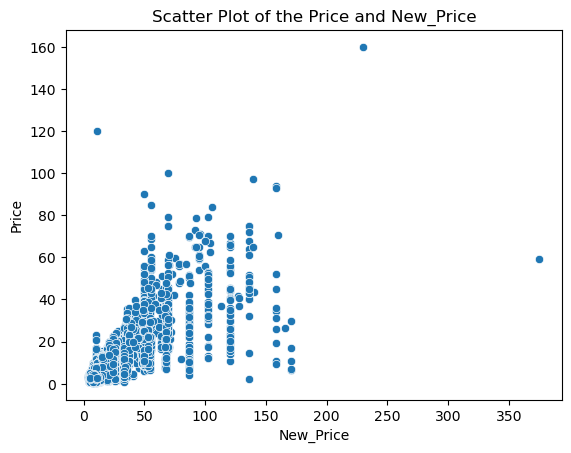

In [34]:
# scatter plot to visually view relationships between the target "Price" and New_Price variable

sns.scatterplot(data= UsedCar, y ="Price", x = "New_Price");
plt.title("Scatter Plot of the Price and New_Price")
plt.ylabel("Price")
plt.xlabel("New_Price")
plt.show();

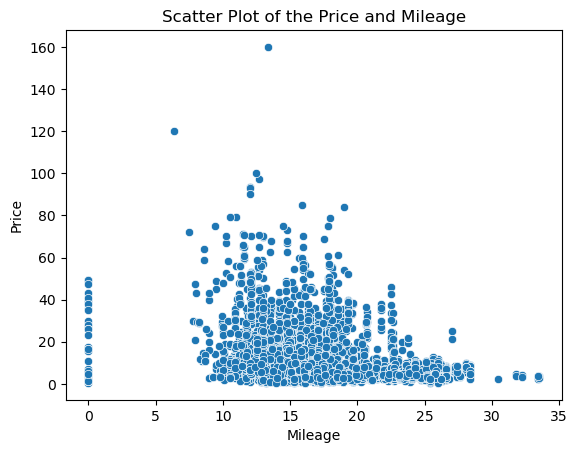

In [35]:
# scatter plot to visually view relationships between the target "Price" and Mileage variable

sns.scatterplot(data= UsedCar, y="Price", x = "Mileage");
plt.title("Scatter Plot of the Price and Mileage")
plt.ylabel("Price")
plt.xlabel("Mileage")
plt.show();

## To build the model

- The two Categorical variables in the data Name and location will be dropped. Using get_dummies method, we will convert Fuel_type, Transmission and Owner_type to numerical variable.

In [36]:
# To drop the categorical variables

UsedCar = UsedCar.drop(["Name","Location", "Owner_Type"], axis =1)


In [37]:
# To check the remaining variables 

UsedCar.shape

(6019, 11)

In [38]:
UsedCar= pd.get_dummies(UsedCar, drop_first=True)
UsedCar

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,0,2010,72000,26.60,998.0,58.16,5.0,5.51,1.75,0,0,0,0,1
1,1,2015,41000,19.67,1582.0,126.20,5.0,16.06,12.50,1,0,0,0,1
2,2,2011,46000,18.20,1199.0,88.70,5.0,8.61,4.50,0,0,0,1,1
3,3,2012,87000,20.77,1248.0,88.76,7.0,11.27,6.00,1,0,0,0,1
4,4,2013,40670,15.20,1968.0,140.80,5.0,53.14,17.74,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,2014,27365,28.40,1248.0,74.00,5.0,7.88,4.75,1,0,0,0,1
6015,6015,2015,100000,24.40,1120.0,71.00,5.0,8.23,4.00,1,0,0,0,1
6016,6016,2012,55000,14.00,2498.0,112.00,8.0,11.67,2.90,1,0,0,0,1
6017,6017,2013,46000,18.90,998.0,67.10,5.0,5.51,2.65,0,0,0,1,1


- There are 6019 rows and 9 columns in the data

In [39]:
# To seperate the target from the independent variables and given target new variable name, y

X = UsedCar.drop("Price", axis =1)

y = UsedCar["Price"]

In [40]:
# To split data into 80% for training data and 20% for testing data

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [41]:
# To check the dimension of the target training data

x_train.shape

(4815, 13)

- There are 4815 rows and 8 columns in the training data

In [42]:
# To check the dimension of the target testing data

x_test.shape

(1204, 13)

- There are 1204 rows and 8 columns in the testing data

In [43]:
# To create an instant of the scaler

scaler = StandardScaler()

# For scaler to calculate and convert each variable to have a mean and standard deviation of 0 and 1, and save it in a new name
    
x_train_scaler = scaler.fit_transform(x_train)


x_test_scaler = scaler.transform(x_test)

In [44]:
# To instantiate linear regression

lr = LinearRegression()

# To build the model

lr.fit(x_train_scaler, y_train)

LinearRegression()

In [45]:
# To know the values of the coefficients

lr.coef_

array([-0.10081474,  3.53732073,  0.2408662 , -0.55658851,  0.57008194,
        3.82974569, -0.70568802,  4.72740814, -0.29793358,  0.09543609,
        0.0473876 , -0.85860235, -0.14794774])

In [46]:
# To iterate through the coefficients in order to know the coefficent of each independent variable

for idx, col_name in enumerate(X.columns):           
    print(f"{col_name} has coefficient of {lr.coef_[idx]}")

S.No. has coefficient of -0.10081474438096284
Year has coefficient of 3.537320734455488
Kilometers_Driven has coefficient of 0.24086619956649116
Mileage has coefficient of -0.5565885111991874
Engine has coefficient of 0.5700819382692855
Power has coefficient of 3.829745685403835
Seats has coefficient of -0.7056880222934164
New_Price has coefficient of 4.727408143282718
Fuel_Type_Diesel has coefficient of -0.29793358128920744
Fuel_Type_Electric has coefficient of 0.09543609230116416
Fuel_Type_LPG has coefficient of 0.04738760473474315
Fuel_Type_Petrol has coefficient of -0.8586023471067842
Transmission_Manual has coefficient of -0.14794773612422318


**Interpretation of the coefficients**

- For every unit increase in the New_price variable, it will cause an increase of 4.72% in the model performance
- For every unit increase in the seats variable will cause a decrease of 0.6% in the model performance

In [47]:
# function to compute different metrics to check performance of a regression model

def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model

def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

# predicting using the independent variables

    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

# creating a dataframe of metrics

    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

### To check the linear regression model training performance

In [48]:
# To know the performance of the train data

df_train = model_performance_regression(lr, x_train_scaler, y_train)

df_train

,RMSE,MAE,R-squared,Adj. R-squared
0,5.620276,3.177804,0.750206,0.749529


In [49]:
# To know the performance of the test data

df_test = model_performance_regression(lr, x_test_scaler, y_test)

df_test

,RMSE,MAE,R-squared,Adj. R-squared
0,5.544403,3.138558,0.743571,0.74077


- Though the performance of the model is 74% on both train and test data but the model generalizez well.

### Using ridge regression to improve the model....

In [50]:
# from the library, import the ridge algorithm

from sklearn.linear_model import Ridge

# instantiate the model and set the regularisation strenghth of alpha to 0.05

ridge = Ridge(alpha = 0.8, random_state = 0)

# To train the model

ridge.fit(x_train_scaler, y_train)

Ridge(alpha=0.8, random_state=0)

In [51]:
# To check the ridge model's training performance

df_train2 = model_performance_regression(ridge, x_train_scaler, y_train)

df_train

,RMSE,MAE,R-squared,Adj. R-squared
0,5.620276,3.177804,0.750206,0.749529


In [52]:
# To check the ridge model's testing performance

df_test2 = model_performance_regression(ridge, x_test_scaler, y_test)

df_test2

,RMSE,MAE,R-squared,Adj. R-squared
0,5.544212,3.138383,0.743589,0.740788


### The performance of the model didnt improve both on train and testing

In [53]:
# from the library, import the lasso algorithm

from sklearn.linear_model import Lasso

# To create an instant of lasso regression and set the regularisation strenghth of alpha to 0.8

lasso = Lasso(alpha = 0.8, random_state = 0)

# To build lasso model

lasso.fit(x_train_scaler, y_train)

Lasso(alpha=0.8, random_state=0)

In [54]:
# To check the lasso model's training performance

df_train3 = model_performance_regression(lasso, x_train_scaler, y_train)

df_train3

,RMSE,MAE,R-squared,Adj. R-squared
0,5.786343,3.038223,0.735226,0.734509


In [55]:
# To check the lasso model's testing performance

df_test3 = model_performance_regression(lasso, x_test_scaler, y_test)

df_test3

,RMSE,MAE,R-squared,Adj. R-squared
0,5.572335,2.960929,0.740981,0.738151


## There is some slight changes in the train and test data when using Lasso to build the model